# Contents
 - [Imports](#Imports)
 - [Signac](#Signac)
 - [Plotting Functions](#PlotFunctions)
 - [Old School](#OldSchool)
 - [Adsorption Isotherm](#Adsorption) (N v P)
 - [Pressure vs. Chemical Potential](#PvMu) (P v $\mu$)
 - [Number of Molecules vs. Chemical Potential](#NvMu) (N v $\mu$)
 - [Pressure vs. Temperature](#PvT) (P v T)
 - [Number of Moles vs. Temperature](#NvT) (N v T)
 - [Total Energy](#TotalEnergy)
 - [Notes](#Notes)
 


# Interesting Etherpads
 - [7-30: New Sweeps](https://etherpad.boisestate.edu/p/ldrd-s20-12)

In [1]:
# Quick commands
# ![](adsorption/traj.gif) # To diplay an image in Markdown
#!tail -n 1 workspace/*/surfequil*.prp
#!head -n 10 M1_Mix/workspace/*/surfequil*.prp


<a id="Imports"></a>
## Imports

In [2]:
import mosdef_cassandra as mc
import generate_mc as gen   # Chris' script
import mbuild as mb
import foyer
import signac
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import random
from glob import glob
import unyt as u    # For Cassandra's physical unit specification 
                    # https://mosdef-cassandra.readthedocs.io/en/latest/guides/unyts.html

/home/nealeellyson/miniconda3/envs/mc/lib/python3.7/site-packages/signac/common/host.py:19: DeprecatedWarning: SimpleKeyring is deprecated as of 1.3 and will be removed in 2.0. The crypt module is deprecated.
  SESSION_PASSWORD_HASH_CACHE = SimpleKeyring()


<a id="Signac"></a>
## Signac - Get Project

In [3]:
data_path = "/home/erjank_project/nealeellyson/MosCas/signac/"
project = signac.get_project(data_path)

In [4]:
state_dict={"chem_pot": [100,150,200,350,400,450,500,550,600], 
            "T": [66]}
job_list= project.find_jobs(state_dict)
#specify file type
for job in job_list:
    equilprp_path = job.fn('surfequil*.prp')        
    prodprp_path = job.fn('surfprod*.prp')


<a id="PlotFunctions"></a>
## Plotting Functions

In [5]:
def plot_adsorption(chemical_potentials,temperatures,simtype,runtype):    
    if simtype == 'M1_Mix':
        mix = [[8,'Ethane'],
               [9,'Helium'],
               [10,'Oxygen'],
               [slice(8,10),'Gas Mixture']]
    else:
        mix = [[8,'Ethane']]
    for gas in mix:
        for chem_pot in chemical_potentials:
            for temp in temperatures:
                if len(chemical_potentials) == 1:
                    label = fr"T = {temp:.0f} K"
                else:
                    label = fr"$\mu$ = {chem_pot:.0f} kJ/mol"
                file = glob(f"{simtype}/workspace/*/surf{runtype}_{chem_pot:.0f}_{temp:.0f}.out.prp")
                print(file[0][-23:])
                a = np.loadtxt(file[0])
                pressure = np.mean(a[:,5])
                nmol = np.mean(a[:,gas[0]])
                stdP = np.std(a[:,5])
                stdN = np.std(a[:,gas[0]])
                plt.scatter(pressure,nmol, label = label)
#                plt.errorbar(pressure,nmol, yerr = stdN, xerr = stdP)
#                pressures.append(np.mean(a[:,5]))
#                nmols.append(np.mean(a[:,8]))
        if len(chemical_potentials) == 1:
            title = fr"""Adsorption isotherm for M1 & {gas[1]} at $\mu$ = {chem_pot:.0f} kJ/mol"""
        else:
            title = fr"""Adsorption isotherm for M1 & {gas[1]} at T = {temp:.0f} K"""
        plt.title(title)
        plt.xlabel("Pressure (bar)")
        plt.ylabel(f"Number of {gas[1]} Molecules")
        plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
        plt.show()

In [6]:
def plot_PvMu(chemical_potentials,temperatures,simtype,runtype):    
    gas = [slice(8,10),'Gas Mixture']
    for chem_pot in chemical_potentials:
        for temp in temperatures:
            if len(chemical_potentials) == 1:
                label = fr"T = {temp:.0f} K"
            else:
                label = fr"$\mu$ = {chem_pot:.0f} kJ/mol"
            file = glob(f"{simtype}/workspace/*/surf{runtype}_{chem_pot:.0f}_{temp:.0f}.out.prp")
            print(file[0][-23:])
            a = np.loadtxt(file[0])
            pressure = np.mean(a[:,5])
            stdP = np.std(a[:,5])
            plt.scatter(chem_pot, pressure, label = label)
            plt.errorbar(chem_pot, pressure, yerr = stdP)
#                pressures.append(np.mean(a[:,5]))
#                nmols.append(np.mean(a[:,8]))
    if len(chemical_potentials) == 1:
        title = fr"""Pressure vs. Chemical Potential for M1 & {gas[1]} at $\mu$ = {chem_pot:.0f} kJ/mol"""
    else:
        title = fr"""Pressure vs. Chemical Potential for M1 & {gas[1]} at T = {temp:.0f} K"""
    plt.title(title)
    plt.xlabel("Chemical Potential")
    plt.ylabel(f"Pressure")
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.show()

In [7]:
def plot_NvMu(chemical_potentials,temperatures,simtype,runtype):    
    if simtype == 'M1_Mix':
        mix = [[8,'Ethane'],
               [9,'Helium'],
               [10,'Oxygen'],
               [slice(8,10),'Gas Mixture']]
    else:
        mix = [[8,'Ethane']]
    for gas in mix:
        for chem_pot in chemical_potentials:
            for temp in temperatures:
                if len(chemical_potentials) == 1:
                    label = fr"T = {temp:.0f} K"
                else:
                    label = fr"$\mu$ = {chem_pot:.0f} kJ/mol"
                file = glob(f"{simtype}/workspace/*/surf{runtype}_{chem_pot:.0f}_{temp:.0f}.out.prp")
                print(file[0][-23:])
                a = np.loadtxt(file[0])
                nmol = np.mean(a[:,gas[0]])
                stdN = np.std(a[:,gas[0]])                
                plt.scatter(chem_pot, nmol, label = label)
                plt.errorbar(chem_pot, nmol, yerr = stdN)
#                pressures.append(np.mean(a[:,5]))
#                nmols.append(np.mean(a[:,8]))
        if len(chemical_potentials) == 1:
            title = fr"""Number of {gas[1]} Molecules vs. Chemical Potential for M1 & {gas[1]} at $\mu$ = {chem_pot:.0f} kJ/mol"""
        else:
            title = fr"""Number of {gas[1]} Molecules vs. Chemical Potential for M1 & {gas[1]} at T = {temp:.0f} K"""
        plt.title(title)
        plt.xlabel("Chemical Potential")
        plt.ylabel(f"Number of {gas[1]} Molecules")
        plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
        plt.show()

In [8]:
def plot_PvT(chemical_potentials,temperatures,simtype,runtype):    
    gas = [slice(8,10),'Gas Mixture']
    for chem_pot in chemical_potentials:
        for temp in temperatures:
            if len(chemical_potentials) == 1:
                label = fr"T = {temp:.0f} K"
            else:
                label = fr"$\mu$ = {chem_pot:.0f} kJ/mol"
            file = glob(f"{simtype}/workspace/*/surf{runtype}_{chem_pot:.0f}_{temp:.0f}.out.prp")
            print(file[0][-23:])
            a = np.loadtxt(file[0])
            pressure = np.mean(a[:,5])
            stdP = np.std(a[:,5])
            plt.scatter(temp, pressure, label = label)
            plt.errorbar(temp, pressure, yerr = stdP)
#                pressures.append(np.mean(a[:,5]))
#                nmols.append(np.mean(a[:,8]))
    if len(chemical_potentials) == 1:
        title = fr"""Pressure vs. Temperature for M1 & {gas[1]} at $\mu$ = {chem_pot:.0f} kJ/mol"""
    else:
        title = fr"""Pressure vs. Temperature for M1 & {gas[1]} at T = {temp:.0f} K"""
    plt.title(title)
    plt.xlabel("Temperature")
    plt.ylabel(f"Pressure")
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.show()

In [9]:
def plot_NvT(chemical_potentials,temperatures,simtype,runtype):    
    if simtype == 'M1_Mix':
        mix = [[8,'Ethane'],
               [9,'Helium'],
               [10,'Oxygen'],
               [slice(8,10),'Gas Mixture']]
    else:
        mix = [[8,'Ethane']]
    for gas in mix:
        for chem_pot in chemical_potentials:
            for temp in temperatures:
                if len(chemical_potentials) == 1:
                    label = fr"T = {temp:.0f} K"
                else:
                    label = fr"$\mu$ = {chem_pot:.0f} kJ/mol"
                file = glob(f"{simtype}/workspace/*/surf{runtype}_{chem_pot:.0f}_{temp:.0f}.out.prp")
                print(file[0][-23:])
                a = np.loadtxt(file[0])
                nmol = np.mean(a[:,gas[0]])
                stdN = np.std(a[:,gas[0]])                
                plt.scatter(temp, nmol, label = label)
                plt.errorbar(temp, nmol, yerr = stdN)
#                pressures.append(np.mean(a[:,5]))
#                nmols.append(np.mean(a[:,8]))
        if len(chemical_potentials) == 1:
            title = fr"""Number of {gas[1]} Molecules vs. Temperature for M1 & {gas[1]} at $\mu$ = {chem_pot:.0f} kJ/mol"""
        else:
            title = fr"""Number of {gas[1]} Molecules vs. Temperature for M1 & {gas[1]} at T = {temp:.0f} K"""
        plt.title(title)
        plt.xlabel("Temperature")
        plt.ylabel(f"Number of {gas[1]} Molecules")
        plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
        plt.show()

<a id="OldSchool"></a>
## Old School Data Retrieval 

### Run 0
```
temp = 66
chemical_potentials = [ 0, 33, 66, 133, 166, 199, 233, 266, 299] 
```
The production runs barfed due to project.py not being written correctly. I presented the equilibrium runs where it was obvious $\mu$ = 
[33](https://files.slack.com/files-pri/TF1GZNR6W-F0181USUZLL/image.png), 
[199](https://files.slack.com/files-pri/TF1GZNR6W-F017F1HTAUX/image.png), and 
[299](https://files.slack.com/files-pri/TF1GZNR6W-F017F1JHUCX/image.png) kJ/mol were not fully equilibrated. 

[Adsorption Isotherm, N v P](https://files.slack.com/files-pri/TF1GZNR6W-F018KJ6MBDE/image.png)

Notes from Eric:
 - So the N vs P is pretty noisy, but that's not really here nor there since I expect there's really high uncertainty in the pressure calculations. Also, those pressures are REALLY high, so if we think they're right then we can maybe calm it down on shoving chemical potential up so high
 - Rearranging so it's N vs mu in my head is less noisy, but the qualitative trend is right
 - Having the standard deviation in N for the equilibrated part of the trajectory will be key here.
 - So we'll calculate that in the next steps
 - For the Total Energy trajectories, the Mu=33 definitely needs to run longer
 - the 199 and 299 cases might be fine after 2e7 steps, but also those slumps before the last 2e7 steps are sad newses: Classic slow-to equilibrate dynamics.
 - It'll be good to take a closer peek at these trajectories and also check the lit  about pumping up pressure to adsorb small molecules on surfaces: Are there examples of ethane on other surfaces people have studied?

### Run 1
```python
temp = 66
chemical_potentials = [ 100, 150, 200, 350, 400, 450, 600] 
```

Some of the chemical potentials barfed, so data is not a complete picture, but it was noted that the pressures are really high. Also curious why we used such high chemical potentials when they're note seemingly based in reality.

[Adsorption Isotherm, N v P](https://files.slack.com/files-pri/TF1GZNR6W-F017UBFDG7Q/image.png)

Notes from Eric: (From 7-30 Etherpad, see above)
 - Turn down chemical potential until ethanes start coming off the surface
 - Try higher temperatures
 - Run these 2 parameter sweeps with MC:
 - Chem potential of zero --> # of molecules as a function of T. Sweep form temps of 66 - 833 (5 - 10 temps in this range). # of surface molecules should decrease as T increases
 - Pick a middle temp (400K) and sweep over chemical potentials of 0 - 10
 - Start job with negative chemical potential, -100 (maybe tack onto 400 K run?)

In [10]:
temperatures = [66]
chemical_potentials = [ 100, 150, 200, 350, 400, 450, 600] 
pressures = []
nmols = []
runtype = ('prod') # equil or prod
simtype = 'M1_Ethane'
#plot_adsorption(chemical_potentials,temperatures,simtype,runtype)
#plot_PvMu(chemical_potentials,temperatures,simtype,runtype)
#plot_NvMu(chemical_potentials,temperatures,simtype,runtype)

### Run 2
```python
temperatures = [ 66, 151, 236, 321, 406, 492, 577, 662, 747, 833]
chem_pot = 0
```

Slight trend in the isotherm, that's not really an isotherm so it's a bit curious why there's a trend

[Adsorption Isotherm, N v P](https://files.slack.com/files-pri/TF1GZNR6W-F017RU76FRD/image.png)

[P v T, with error bars](https://files.slack.com/files-pri/TF1GZNR6W-F0185NB8LBX/image.png)

[N v T, with error bars](https://files.slack.com/files-pri/TF1GZNR6W-F0185ND378V/image.png)

Notes from Eric:
 - I'm surprised how little N changes (Mike)
 - The pressure plot still doesn't make great sense to me yet: the higher pressures at Lower T don't check out, but we can set that aside for the moment
 - The lower N at higher T, for constant mu (N v T) looks sensible
 - Let's crank up T a bit more and do that T sweep again at a $\mu$ that we think will lower the number of ethane on the surface 

In [11]:
temperatures = [ 66, 151, 236, 321, 406, 492, 577, 662, 747, 833]
chemical_potentials = [0]
pressures = []
nmols = []
runtype = ('prod') # equil or prod
simtype = 'M1_Ethane'
#plot_adsorption(chemical_potentials,temperatures,simtype,runtype)
#plot_PvT(chemical_potentials,temperatures,simtype,runtype)
#plot_NvT(chemical_potentials,temperatures,simtype,runtype)

### Run 3
```python
temp = 406
chemical_potentials = [ -100, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]
```

The negative chemical potential did not make it, ended up being due to a bug within Cassandra, but submitted an issue to mosdef_cassandra all the same. Found a work around that isn't impeding other data so will utilize that in the meantime. 

[Adsorption Isotherm, N v P](https://files.slack.com/files-pri/TF1GZNR6W-F018Z0GQKGQ/image.png)

[P v $\mu$, with error bars](https://files.slack.com/files-pri/TF1GZNR6W-F018FAP8THS/image.png)

[N v $\mu$, with error bars](https://files.slack.com/files-pri/TF1GZNR6W-F0189B9RPHR/image.png)

Notes from Eric:
 - the N vs $\mu$ plot from $\mu$ = 1:10 looks better than our prior calcs- nice
 - Still a little surprised that it doesn't dip below 40's.
 - I'm curious to see a sweep of $\mu$ from -10 to 10 for T=800

In [12]:
temperatures = [406]
chemical_potentials = [ -100, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10] # Original 
chemical_potentials = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]
pressures = []
nmols = []
runtype = ('prod') # equil or prod
simtype = 'M1_Ethane'
#plot_adsorption(chemical_potentials,temperatures,simtype,runtype)
#plot_PvMu(chemical_potentials,temperatures,simtype,runtype)
#plot_NvMu(chemical_potentials,temperatures,simtype,runtype)

### Run 4
```python
temp = 800
chemical_potentials = [-10,  -7,  -5,  -3,  -1,   1,   3,   5,   7,  10] 
```

Fixed the negative numbers barfing on their production runs so we can evaluate whether 

[Adsorption Isotherm, N v P](https://files.slack.com/files-pri/TF1GZNR6W-F0184QY3A4W/image.png)

[P v $\mu$, with error bars](https://files.slack.com/files-pri/TF1GZNR6W-F017WQLSP6K/image.png)

[N v $\mu$, with error bars](https://files.slack.com/files-pri/TF1GZNR6W-F018BHA5BHQ/image.png)

Notes from Eric: (More discussion in 8-6 Etherpad)
 - Look at that trend! (RE: N v $\mu$)


In [13]:
temperatures = [800]
chemical_potentials = [-10,  -7,  -5,  -3,  -1,   1,   3,   5,   7,  10] 
pressures = []
nmols = []
runtype = ('prod') # equil or prod
simtype = 'M1_Ethane'
#plot_adsorption(chemical_potentials,temperatures,simtype,runtype)
#plot_PvMu(chemical_potentials,temperatures,simtype,runtype)
#plot_NvMu(chemical_potentials,temperatures,simtype,runtype)

### Run 5
```python
temperatures = [ 66, 151, 236, 321, 406, 492, 577, 662, 747, 833]
chem_pot = -5
```

First run with a mixture of ethane, oxygen, and helium gas floating about. 

[Adsorption Isotherm, N v P](https://files.slack.com/files-pri/TF1GZNR6W-F0184QY3A4W/image.png)

[P v $\mu$, with error bars](https://files.slack.com/files-pri/TF1GZNR6W-F017WQLSP6K/image.png)

[N v $\mu$, with error bars](https://files.slack.com/files-pri/TF1GZNR6W-F018BHA5BHQ/image.png)

Notes from Eric: (More discussion in 8-6 Etherpad)
 - Look at that trend! (RE: N v $\mu$)


In [14]:
temperatures = [ 66, 151, 236, 321, 406, 492, 577, 662, 747, 833]
chemical_potentials = [-5]
pressures = []
nmols = []
runtype = ('prod') # equil or prod
simtype = 'M1_Mix'
#plot_adsorption(chemical_potentials,temperatures,simtype,runtype)
#plot_PvT(chemical_potentials,temperatures,simtype,runtype)
#plot_NvT(chemical_potentials,temperatures,simtype,runtype)

<a id="Adsorption"></a>
## Adsorption Isotherm

In [15]:
#for temp in temperatures:
for chem_pot in chemical_potentials:
    file = glob(f"{simtype}/workspace/*/surf{runtype}_{chem_pot:.0f}_{temp:.0f}.out.prp")
    print(file[0][-23:])
    a = np.loadtxt(file[0])
    pressure = np.mean(a[:,5])
    nmol = np.mean(a[:,8])
    stdP = np.std(a[:,5])
    stdN = np.std(a[:,8])
    plt.scatter(pressure,nmol, label = fr"$\mu$ = {chem_pot:.0f} kJ/mol")
#    plt.errorbar(pressure,nmol, yerr = stdN, xerr = stdP)
    pressures.append(np.mean(a[:,5]))
    nmols.append(np.mean(a[:,8]))

plt.title(fr"""Adsorption isotherm for M1 & Ethanes
          at T = {temp:.0f} K""") # at $\mu$ = {chem_pot:.0f} kJ/mol""") # 
plt.xlabel("Pressure (bar)")
plt.ylabel("Number of Ethane Molecules")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

NameError: name 'temp' is not defined

<a id="PvMu"></a>
## Pressure, P, vs. Chemical Potential, $\mu$

In [ ]:
#for temp in temperatures:
for chem_pot in chemical_potentials:
    file = glob(f"signac/workspace/*/surf{runtype}_{chem_pot:.0f}_{temp:.0f}.out.prp")
    print(file[0][-23:])
    a = np.loadtxt(file[0])
    pressure = np.mean(a[:,5])
    nmol = np.mean(a[:,8])
    stdP = np.std(a[:,5])
    stdN = np.std(a[:,8])
    plt.scatter(chem_pot, pressure, label = fr"$\mu$ = {chem_pot:.0f} kJ/mol")
    plt.errorbar(chem_pot, pressure, yerr = stdP)

plt.title(f"""Pressure vs. Chemical Potential for M1 & Ethanes 
          at T = {temp:.0f}K""")
plt.xlabel("Chemical Potential")
plt.ylabel("Pressure")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

<a id="NvMu"></a>
## Number of Molecules, N, vs. Chemical Potential, $\mu$

urfprod_-10_800.out.prp
surfprod_-7_800.out.prp
surfprod_-5_800.out.prp
surfprod_-3_800.out.prp
surfprod_-1_800.out.prp
/surfprod_1_800.out.prp
/surfprod_3_800.out.prp
/surfprod_5_800.out.prp
/surfprod_7_800.out.prp
surfprod_10_800.out.prp


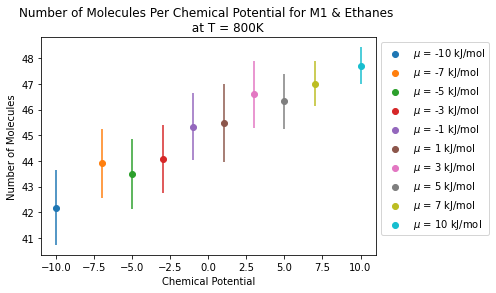

In [14]:
#for temp in temperatures:
for chem_pot in chemical_potentials:
    file = glob(f"signac/workspace/*/surf{runtype}_{chem_pot:.0f}_{temp:.0f}.out.prp")
    print(file[0][-23:])
    a = np.loadtxt(file[0])
    pressure = np.mean(a[:,5])
    nmol = np.mean(a[:,8])
    stdP = np.std(a[:,5])
    stdN = np.std(a[:,8])
    plt.scatter(chem_pot, nmol, label = fr"$\mu$ = {chem_pot:.0f} kJ/mol")
    plt.errorbar(chem_pot, nmol, yerr = stdN)

plt.title(f"""Number of Molecules Per Chemical Potential for M1 & Ethanes 
          at T = {temp:.0f}K""")
plt.xlabel("Chemical Potential")
plt.ylabel("Number of Molecules") 
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

<a id="PvT"></a>
## Pressure, P, vs. Temperature, T

a/surfprod_0_66.out.prp
/surfprod_0_151.out.prp
/surfprod_0_236.out.prp
/surfprod_0_321.out.prp
/surfprod_0_406.out.prp
/surfprod_0_492.out.prp
/surfprod_0_577.out.prp
/surfprod_0_662.out.prp
/surfprod_0_747.out.prp
/surfprod_0_833.out.prp


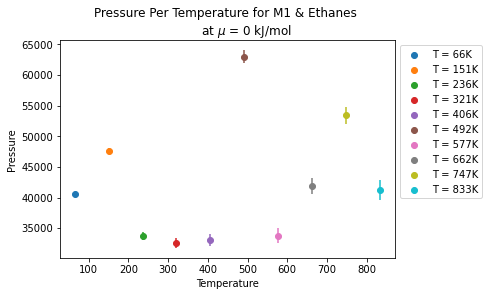

In [43]:
for temp in temperatures:
#for chem_pot in chem_pots:
    file = glob(f"signac/workspace/*/surf{runtype}_{chem_pot:.0f}_{temp:.0f}.out.prp")
    print(file[0][-23:])
    a = np.loadtxt(file[0])
    pressure = np.mean(a[:,5])
    nmol = np.mean(a[:,8])
    stdP = np.std(a[:,5])
    stdN = np.std(a[:,8])
    plt.scatter(temp,pressure, label = f"T = {temp:.0f}K")
    plt.errorbar(temp,pressure, yerr = stdP)

plt.title(fr"""Pressure Per Temperature for M1 & Ethanes 
          at $\mu$ = {chem_pot:.0f} kJ/mol""")
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

<a id="NvT"></a>
## Number of Moles, N, vs. Temperature, T

a/surfprod_0_66.out.prp
/surfprod_0_151.out.prp
/surfprod_0_236.out.prp
/surfprod_0_321.out.prp
/surfprod_0_406.out.prp
/surfprod_0_492.out.prp
/surfprod_0_577.out.prp
/surfprod_0_662.out.prp
/surfprod_0_747.out.prp
/surfprod_0_833.out.prp


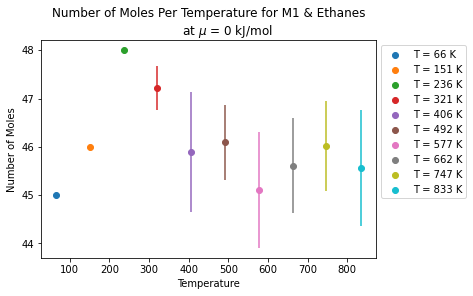

In [44]:
for temp in temperatures:
#for chem_pot in chem_pots:
    file = glob(f"signac/workspace/*/surf{runtype}_{chem_pot:.0f}_{temp:.0f}.out.prp")
    print(file[0][-23:])
    a = np.loadtxt(file[0])
    pressure = np.mean(a[:,5])
    nmol = np.mean(a[:,8])
    stdP = np.std(a[:,5])
    stdN = np.std(a[:,8])
    plt.scatter(temp,nmol, label = f"T = {temp:.0f} K")
    plt.errorbar(temp,nmol, yerr = stdN)

plt.title(fr"""Number of Moles Per Temperature for M1 & Ethanes
          at $\mu$ = {chem_pot:.0f} kJ/mol""")
plt.xlabel("Temperature")
plt.ylabel("Number of Moles")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

<a id="TotalEnergy"></a>
## Total Energy

/surfprod_-5_66.out.prp


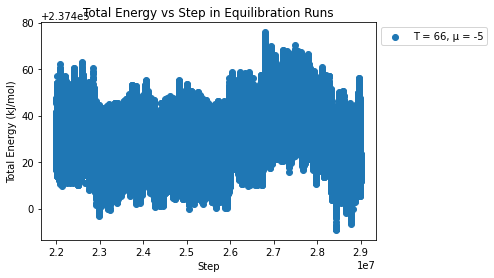

surfprod_-5_151.out.prp


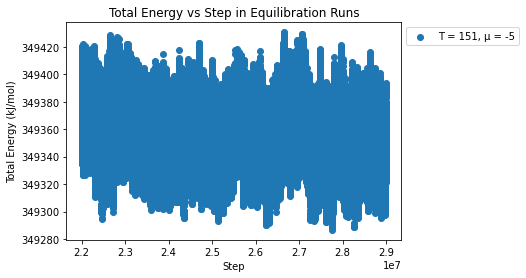

surfprod_-5_236.out.prp


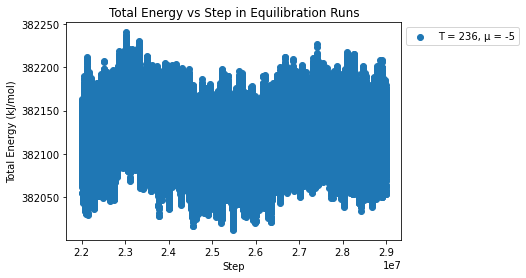

surfprod_-5_321.out.prp


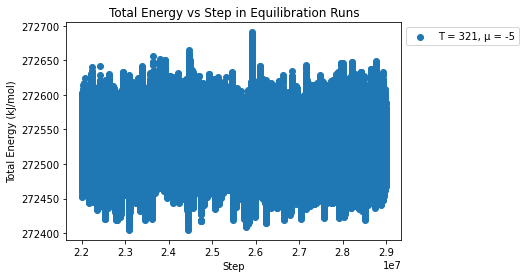

surfprod_-5_406.out.prp


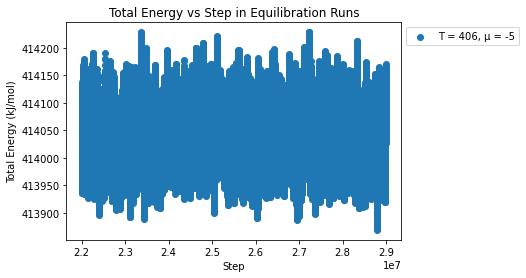

surfprod_-5_492.out.prp


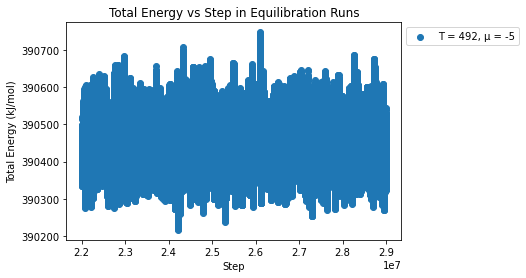

surfprod_-5_577.out.prp


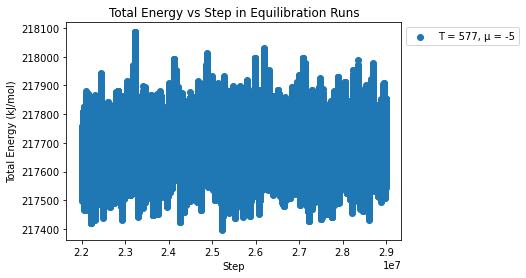

surfprod_-5_662.out.prp


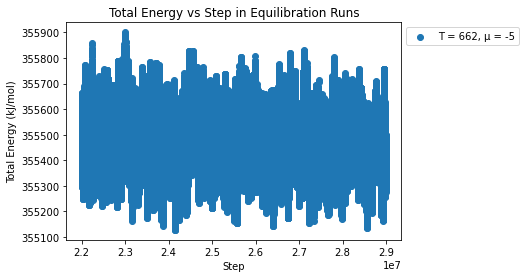

surfprod_-5_747.out.prp


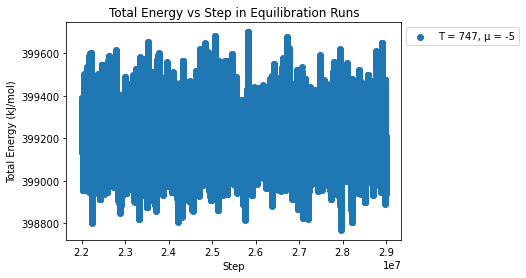

surfprod_-5_833.out.prp


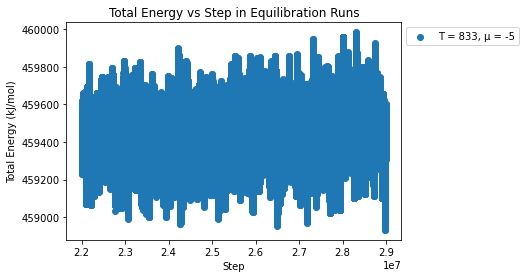

In [17]:
for temp in temperatures:
#for chem_pot in chem_pots:
    file = glob(f"{simtype}/workspace/*/surf{runtype}_{chem_pot:.0f}_{temp:.0f}.out.prp")
    print(file[0][-23:])
    a = np.loadtxt(file[0])
    plt.scatter(a[:,0],a[:,1], label=f"T = {temp:.0f}, μ = {chem_pot:.0f}")
    plt.xlabel("Step")
    plt.ylabel("Total Energy (kJ/mol)")
    plt.title("Total Energy vs Step in Equilibration Runs")
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.show()

<a id="Notes"></a>
## Notes

From Ryan:

So I wouldn’t trust the “pressure” computed in the system with ethane + surface. Generally speaking, when you have fixed atoms in a system the pressure is bogus. You’ll want to simulate a system with just ethane at the same chemical potential potential and determine the average pressure from those simulations.

Then since at equilibrium the chemical potentials have to be equal you can equate the pressure from the pure phase system to the pressure in the system with the surface

Yeah you would. So you’ll run at a range of `mu` (gas phase); compute `P` for each, if you plot `mu` vs. `log(P)` its pretty linear generally so you can then fit a line to it and you now have a relationship between `mu` and `P`. Then run your simulations with a surface at whatever `mu` you need to get the right `P`.

The gas phase simulations will be very cheap to run. A couple of small cavaets: you’ll want to have a system size large enough that you have ~30-50 molecules in the system. At low chemical potential these systems will become very large (read ~30 nm per side of the box). If you leave your `charge_cutoff` at the same value you normally use, Cassandra will error out because it will require too many k-space vectors to get the desired accuracy. So you’ll need to increase that; 0.25 * box_length has worked for me. My normal approach is to use the IG law to estimate the volume required for 40 molecules, create the box based on that, then go from there.

Here is a script where I’m doing what I just described above:
```python
import os
import sys
import mbuild
import foyer
import unyt as u
import mosdef_cassandra as mc
import numpy as np
from mosdef_cassandra.utils.tempdir import temporary_cd
from mosdef_slitpore.utils.cassandra import spce_water
from mosdef_slitpore.utils.utils import get_ff
# Filter some warnings -- to cleanup output for this demo
from warnings import filterwarnings
filterwarnings("ignore", category=UserWarning)
from parmed.exceptions import OpenMMWarning
filterwarnings("ignore", category=OpenMMWarning)
def main():
    # Create a water molecule with the spce geometry
    water = spce_water()
    ff = foyer.Forcefield(get_ff("pore-spce.xml"))
    water_typed = ff.apply(water)
    # Define conditions
    temperature = 298.0 * u.K
    # Define a range of (shifted) chemical potentials
    mus_adsorbate = np.arange(-60, -36, 3) * u.Unit("kJ/mol")
    # Define custom_args that are the same for all pure phase simulations
    custom_args = {
        "cutoff_style": "cut",
        "charge_style": "ewald",
        "rcut_min": 0.5 * u.angstrom,
        "vdw_cutoff": 9.0 * u.angstrom,
        "prop_freq": 10,
        "angle_style": ["fixed"],
    }
    for mu_adsorbate in mus_adsorbate:
        print(f"\nRun simulation: T = {temperature}, mu = {mu_adsorbate}\n")
        dirname = f"pure_vap_T_{temperature:0.1f}_mu_{mu_adsorbate:.1f}".replace(
            " ", "_"
        ).replace(
            "/", "-"
        )
        if not os.path.isdir(dirname):
            os.mkdir(dirname)
        else:
            pass
        with temporary_cd(dirname):
            # Box size depends on chemical potential
            # Prelim simulation shows mu = -48 kJ/mol; p ~ 0.01 bar
            # Employ IG law to estimate remaining box sizes; target 40 waters
            mu_0 = -48 * u.kJ/u.mol
            p_0 = 0.01 * u.bar
            n_water_target = 40
            p_ig = p_0 * np.exp((mu_adsorbate-mu_0)/(u.kb * temperature))
            vol = n_water_target * u.kb * temperature / p_ig
            boxl = (vol**(1./3.)).to_value("nm")
            custom_args["charge_cutoff"] = 0.25 * boxl * u.nm
            species_list = [water_typed]
            box_list = [mbuild.Box([boxl, boxl, boxl])]
            system = mc.System(
                box_list, species_list,
            )
            moveset = mc.MoveSet("gcmc", species_list)
            moveset.prob_regrow = 0.0
            moveset.prob_translate = 0.3
            moveset.prob_rotate = 0.3
            moveset.prob_insert = 0.2
            mc.run(
                system=system,
                moveset=moveset,
                run_type="equil",
                run_length=500000,
                temperature=temperature,
                run_name="equil",
                chemical_potentials=[mu_adsorbate],
                **custom_args,
            )
            mc.restart(
                system=system,
                moveset=moveset,
                run_type="prod",
                run_length=1000000,
                temperature=temperature,
                run_name="prod",
                restart_name="equil",
                chemical_potentials=[mu_adsorbate],
                **custom_args,
            )
if __name__ == "__main__":
    main()
```

Yes. The reason the `charge_cutoff` doesn’t really affect things is because you’re using an ewald sum to compute the long range electrostatics anyway. The accuracy of the ewald sum controls the accuracy to which the energies are computed. The charge cutoff mainly affects the fraction of the computation handled by the direct pairwise computation and the ewald sum.

Using the IG law just lets you get a volume that is ~40 molecules.

Because the required volume will be a strong function of the chemical potential

(40 is a somewhat arbitrary number, you don’t want 0 and if you have a bunch you’re just simulating more than you need in the gas phase)

*I had brought up that we didn't factor in `charge_cutoff` in the `custom_args`*

Do you have charges on your methane or is it a united atom model?

Sorry I assumed all atom

Yeah it looks like all atom. Where is the `oplsaa` object coming from?

Thats what I figured. Just making sure something else wasn’t happening.

If you’re trying to use the OPLS-AA force field you’re definitely going to want to have the `charge_style` set to `ewald`. I would also be careful with the settings `assert_bond_params=False, assert_angle_params=False, assert_dihedral_params=False`. These can be useful to warn you that something has gone wrong in parameterizing your molecule.

Assuming that you’ve got ethane = mbuild.load("CC", smiles=True) , the sequence should work fine without those extra flags.

(Even if you’re loading from a file it should work as long as your ethane has bonds defined)

Absolutely. If you use charge_style="none" you are running without any charges.

Can I also ask where this selection is coming from "rcut_min": 0.3980 * 2.5* u.angstrom, #(or 3.0)

If I understand what you’re saying, I think you want to set your vdw_cutoff to that value. The rcut_min is the minimum distance that the energy is computed for. If the distance is less than rcut_min the energy is taken to be infinity

https://mosdef-cassandra.readthedocs.io/en/latest/guides/kwargs.html#rcut-min